In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, roc_auc_score, log_loss, roc_curve, auc, precision_score, plot_roc_curve, max_error

In [3]:
def metric_battery(model, X, y, prob=False):
    prediction = model.predict(X)
    mean_error = mean_squared_error(y, prediction, squared=False)
    evs = explained_variance_score(y, prediction, multioutput='variance_weighted')
    r2 = r2_score(y, prediction)
    cross_val = cross_val_score(model, X, y, cv=3)
    
    fpr, tpr, thresholds = roc_curve(y, prediction)
    auc_ = auc(fpr, tpr)
    
    result = {
        "                r2 score": r2,
        "              mean error": mean_error,
        "explained variance score": evs,
        "                variance": np.var(prediction),
        " 3 fold cross validation": cross_val.mean(),
        "                     auc": auc_,
    }
    
    if prob:
        pred_prob = model.predict_proba(X)
        roc_auc = roc_auc_score(y, pred_prob[:, 1])
        
        result.update({"           roc_auc_score": roc_auc,})
    
        plot_curve = plot_roc_curve(model, X, y)
    
    return result

In [99]:
df = pd.read_csv("...")

In [100]:
def direction_label(row):
    x = row['OneDayDifferenceLabel']
    
    if x > 0:
        return 1
    elif x < 0:
        return -1
    return 0
df['DirectionLabel'] = df.apply(lambda row: direction_label(row), axis=1)

In [101]:
def color_label(row):
    x = row['OneDayDifferenceLabel']
    
    if x > 0:
        return "blue"
    elif x < 0:
        return "red"
    return "yellow"
df['color'] = df.apply(lambda row: color_label(row), axis=1)

In [102]:
def cut_label(row):
    x = row['OneDayDifferenceLabel']
    
    if x >= 2:
        return 1
    elif x <= -2:
        return -1
    return 0
df['cut'] = df.apply(lambda row: cut_label(row), axis=1)

In [103]:
df = df[df.CORREL < 0.7]

In [ ]:
df.columns.to_list()

In [104]:
a = 'FastStochasticOscillator'
b = 'CORREL'

work_space = df[[a, b, 'color', 'cut']]

In [105]:
work_space = work_space[work_space['cut'] != 0]

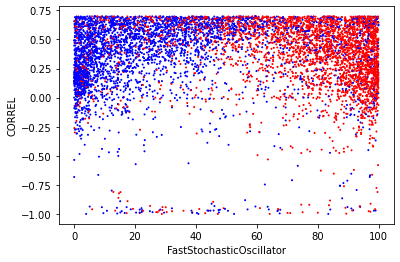

In [106]:
plt.xlabel(a)
plt.ylabel(b)
plt.scatter(work_space[a], work_space[b], c=work_space['color'], s=1)

In [107]:
X = work_space[[a, b]]
y = work_space['cut']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
KNeighbors = KNeighborsClassifier(n_neighbors=25)
KNeighbors.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

{'                r2 score': 0.26560791460557154,
 '              mean error': 0.8568234015614972,
 'explained variance score': 0.2656213039758991,
 '                variance': 0.9997858417608568,
 ' 3 fold cross validation': 0.8128054937157568,
 '                     auc': 0.8164354520772121,
 '           roc_auc_score': 0.8519559638487002}

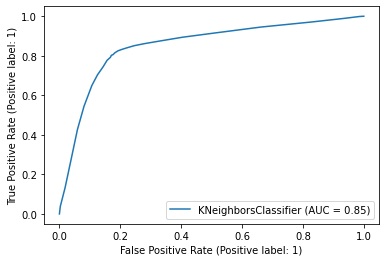

In [109]:
metric_battery(KNeighbors, X_test, y_test, prob=True)

{'                r2 score': 0.26493235669785986,
 '              mean error': 0.8569540447583472,
 'explained variance score': 0.26518408734606613,
 '                variance': 0.9997766894060284,
 ' 3 fold cross validation': 0.8081732235437634,
 '                     auc': 0.8164775583616655,
 '           roc_auc_score': 0.87444747729397}

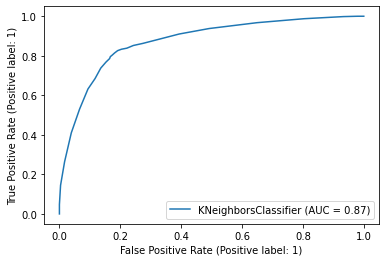

In [110]:
metric_battery(KNeighbors, X_train, y_train, prob=True)

In [111]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=500)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500)

{'                r2 score': 0.25462863093688404,
 '              mean error': 0.8632044666355198,
 'explained variance score': 0.25471231450143195,
 '                variance': 0.9992470999405116,
 ' 3 fold cross validation': 0.8121961091941238,
 '                     auc': 0.813573474169673,
 '           roc_auc_score': 0.8502529103284115}

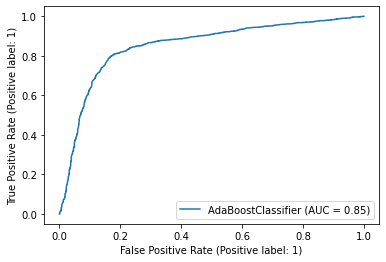

In [112]:
metric_battery(ada, X_test, y_test, prob=True)

{'                r2 score': 0.2783638252631814,
 '              mean error': 0.8490886347175938,
 'explained variance score': 0.27949028267564335,
 '                variance': 0.9999924664064508,
 ' 3 fold cross validation': 0.8048185422384874,
 '                     auc': 0.8201081026733348,
 '           roc_auc_score': 0.8957511143549773}

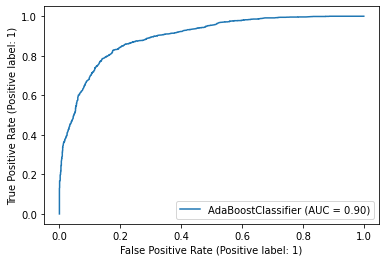

In [113]:
metric_battery(ada, X_train, y_train, prob=True)

In [114]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(X_train, y_train)

KMeans(n_clusters=3)

In [115]:
metric_battery(Kmeans, X_test, y_test, prob=False)

{'                r2 score': -1.4120876259902553,
 '              mean error': 1.5528298322111402,
 'explained variance score': -0.08282432030349218,
 '                variance': 0.561496040303391,
 ' 3 fold cross validation': -98857.69353824719,
 '                     auc': 0.6895600104139546}

In [116]:
metric_battery(Kmeans, X_train, y_train, prob=False)

{'                r2 score': -1.301054773758942,
 '              mean error': 1.5162030230801269,
 'explained variance score': -0.19169866053973172,
 '                variance': 0.586491001866564,
 ' 3 fold cross validation': -102268.11908295145,
 '                     auc': 0.6510579390111753}

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

{'                r2 score': 0.008204708595231924,
 '              mean error': 0.9957225590666038,
 'explained variance score': 0.01142150481645432,
 '                variance': 0.9985243158834026,
 ' 3 fold cross validation': 0.7457311025288064,
 '                     auc': 0.7525700152490051,
 '           roc_auc_score': 0.7979356194443412}

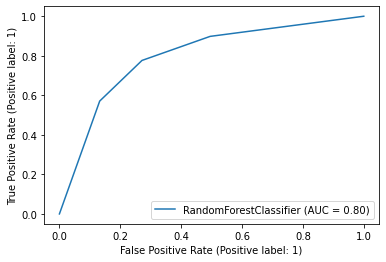

In [118]:
metric_battery(rf, X_test, y_test, prob=True)

{'                r2 score': 0.7545704380336709,
 '              mean error': 0.4951734103452045,
 'explained variance score': 0.7547048681579349,
 '                variance': 0.9982030054201879,
 ' 3 fold cross validation': 0.7453491918267764,
 '                     auc': 0.9384639589485404,
 '           roc_auc_score': 0.976649189509237}

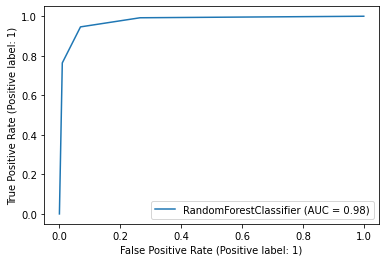

In [119]:
metric_battery(rf, X_train, y_train, prob=True)

In [120]:
from sklearn.neighbors import NearestCentroid
centroid = NearestCentroid()
centroid.fit(X_train, y_train)

NearestCentroid()

In [121]:
metric_battery(centroid, X_test, y_test)

{'                r2 score': 0.24974894930635627,
 '              mean error': 0.8660254037844386,
 'explained variance score': 0.24975824748019515,
 '                variance': 0.9997676234384295,
 ' 3 fold cross validation': 0.8134148782373901,
 '                     auc': 0.812465131848105}

In [122]:
metric_battery(centroid, X_train, y_train)

{'                r2 score': 0.24051150476091165,
 '              mean error': 0.8710728540414289,
 'explained variance score': 0.24076323540911793,
 '                variance': 0.9997766894060284,
 ' 3 fold cross validation': 0.8093931076547728,
 '                     auc': 0.8103723453774284}

In [123]:
from sklearn import svm
support_vector = svm.SVC(probability=True)
support_vector.fit(X_train, y_train)

SVC(probability=True)

{'                r2 score': 0.2521887901216201,
 '              mean error': 0.8646160856760393,
 'explained variance score': 0.2528139993305316,
 '                variance': 0.9999550118976798,
 ' 3 fold cross validation': 0.8140248202928948,
 '                     auc': 0.8132759326068362,
 '           roc_auc_score': 0.8349808457618924}

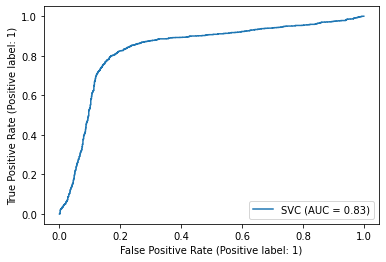

In [124]:
metric_battery(support_vector, X_test, y_test, prob=True)

{'                r2 score': 0.23684837697036942,
 '              mean error': 0.8731709851918517,
 'explained variance score': 0.23686662371853828,
 '                variance': 0.9987699780902636,
 ' 3 fold cross validation': 0.8096980786825251,
 '                     auc': 0.8091462756152692,
 '           roc_auc_score': 0.8429172826495768}

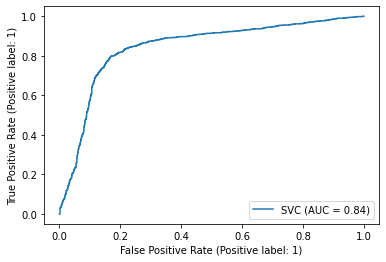

In [125]:
metric_battery(support_vector, X_train, y_train, prob=True)